In [ ]:
import tensorflow as tf

#**Creating Tensorflow Dataset form Existing Tensors**

If the data already exists in the form of a tensor object, a Python list, or a NumPy
array, we can easily create a dataset using the tf.data.Dataset.from_tensor_
slices() function. This function returns an object of class Dataset, which we
can use to iterate through the individual elements in the input dataset.

###"Create a dataset from list of value"

In [3]:

a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


### We can easily iterate through a dataset entry by entry as follows:

In [4]:
for item in ds :
  print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


### If we want to create batches from this dataset, with a desired batch size of 3, we can do this as follows:

In [5]:
ds_batch = ds.batch(3)
for i, elem in enumerate(ds_batch, 1):
  print('batch {}:'.format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


# **Combining two tensors into a joint dataset**

### Often, we may have the data in two (or possibly more) tensors. For example, wecould have a tensor for features and a tensor for labels. In such cases, we need tobuild a dataset that combines these tensors together, which will allow us to retrievethe elements of these tensors in tuples.

In [43]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)  # x hold feature value
t_y = tf.range(4) # y hold class lable
print(t_x)
print(t_y)

tf.Tensor(
[[0.16513085 0.9014813  0.6309742 ]
 [0.4345461  0.29193902 0.64250207]
 [0.9757855  0.43509948 0.6601019 ]
 [0.60489583 0.6366315  0.6144488 ]], shape=(4, 3), dtype=float32)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)


### Now, we want to create a joint dataset from these two tensors. Note that there is a required one-to-one correspondence between the elements of these two tensors:

In [15]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))
for example in ds_joint:
  print(' x:', example[0].numpy(),
         ' y:', example[1].numpy())

 x: [0.16513085 0.9014813  0.6309742 ]  y: 0
 x: [0.4345461  0.29193902 0.64250207]  y: 1
 x: [0.9757855  0.43509948 0.6601019 ]  y: 2
 x: [0.60489583 0.6366315  0.6144488 ]  y: 3


### Alternatively, we can create the joint dataset using **tf.data.Dataset.from_tensor_slices()** as follows:

In [16]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
for example in ds_joint:
  print(' x:', example[0].numpy(),
          ' y:', example[1].numpy()) 

 x: [0.16513085 0.9014813  0.6309742 ]  y: 0
 x: [0.4345461  0.29193902 0.64250207]  y: 1
 x: [0.9757855  0.43509948 0.6601019 ]  y: 2
 x: [0.60489583 0.6366315  0.6144488 ]  y: 3


### Feature Scaling

In [17]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))
for example in ds_trans:
  print(' x:', example[0].numpy(),
         ' y:', example[1].numpy()) 

 x: [-0.6697383   0.80296254  0.26194835]  y: 0
 x: [-0.13090777 -0.41612196  0.28500414]  y: 1
 x: [ 0.951571   -0.12980103  0.32020378]  y: 2
 x: [0.20979166 0.27326298 0.22889757]  y: 3


# **Shuffle, batch, and repeat**

### Shuffle

The .shuffle() method requires an argument called
buffer_size, which determines how many elements in the dataset are grouped
together before shuffling.To ensure complete randomization during each epoch, we can simply
choose a buffer size that is equal to the number of the training examples, as in the
preceding code (buffer_size=len(t_x)).

In [18]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))
for example in ds:
   print(' x:', example[0].numpy(),
           ' y:', example[1].numpy())

 x: [0.9757855  0.43509948 0.6601019 ]  y: 2
 x: [0.4345461  0.29193902 0.64250207]  y: 1
 x: [0.16513085 0.9014813  0.6309742 ]  y: 0
 x: [0.60489583 0.6366315  0.6144488 ]  y: 3


### Batch

In [19]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print('Batch-x:\n', batch_x.numpy())



Batch-x:
 [[0.16513085 0.9014813  0.6309742 ]
 [0.4345461  0.29193902 0.64250207]
 [0.9757855  0.43509948 0.6601019 ]]


In [20]:
print('Batch-y: ', batch_y.numpy())

Batch-y:  [0 1 2]


### Repeat
When training a model for multiple epochs, we need to shuffle and
iterate over the dataset by the desired number of epochs. So, let's repeat the batched
dataset twice:

In [21]:
ds = ds_joint.batch(3).repeat(count=2)
for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


If we change the order of these two
operations, that is, first batch and then repeat, the results will be different:

In [22]:
ds = ds_joint.repeat(count=2).batch(3)
for i,(batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


Combine the operations in the following order: (1) shuffle, (2) batch, and (3) repeat:

In [23]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i,(batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


let's try a different order: (2) batch, (1) shuffle, and (3) repeat

In [24]:
tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)
for i,(batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


# **Creating a dataset from files on your localstorage disk**

We will use the pathlib
library to generate a list of image files:

In [30]:
import pathlib
imgdir_path = pathlib.Path("/content/drive/My Drive/cat_dog_images" )
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['/content/drive/My Drive/cat_dog_images/Cat1.jpg', '/content/drive/My Drive/cat_dog_images/Cat2.jpg', '/content/drive/My Drive/cat_dog_images/Cat3.jpg', '/content/drive/My Drive/cat_dog_images/Dog1.jpg', '/content/drive/My Drive/cat_dog_images/Dog2.jpg', '/content/drive/My Drive/cat_dog_images/Dog3.jpg']


Next, we will visualize these image examples using Matplotlib:

Image shape:  (159, 318, 3)
Image shape:  (183, 275, 3)
Image shape:  (183, 275, 3)
Image shape:  (159, 317, 3)
Image shape:  (194, 259, 3)
Image shape:  (194, 259, 3)


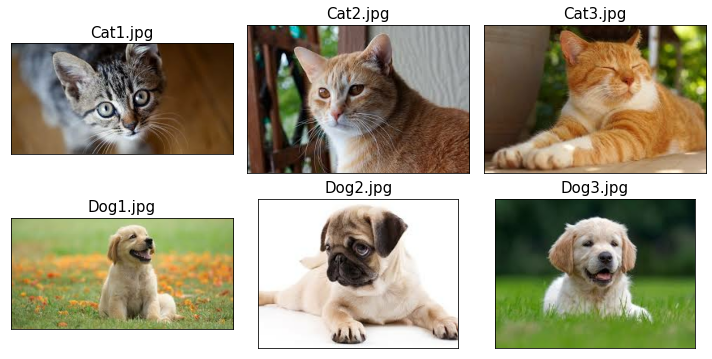

In [33]:
import matplotlib.pyplot as plt
import os
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
  img_raw = tf.io.read_file(file)
  img = tf.image.decode_image(img_raw)
  print('Image shape: ', img.shape)
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(img)
  ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

The
labels for these images are provided within their filenames. So, we extract these
labels from the list of filenames, assigning label 1 to dogs and label 0 to cats:

In [35]:
labels = [1 if 'Dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Now, we have two lists: a list of filenames (or paths of each image) and a list of their
labels. In the previous section, you already learned two ways of creating a joint
dataset from two tensors. Here, we will use the second approach as follows:

In [36]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for item in ds_files_labels:
  print(item[0].numpy(), item[1].numpy())

b'/content/drive/My Drive/cat_dog_images/Cat1.jpg' 0
b'/content/drive/My Drive/cat_dog_images/Cat2.jpg' 0
b'/content/drive/My Drive/cat_dog_images/Cat3.jpg' 0
b'/content/drive/My Drive/cat_dog_images/Dog1.jpg' 1
b'/content/drive/My Drive/cat_dog_images/Dog2.jpg' 1
b'/content/drive/My Drive/cat_dog_images/Dog3.jpg' 1


We have called this dataset ds_files_labels, since it has filenames and labels.
Next, we need to apply transformations to this dataset: load the image content from
its file path, decode the raw content, and resize it to a desired size, for example,
80 × 120. Previously, we saw how to apply a lambda function using the .map()
method. However, since we need to apply multiple preprocessing steps this time,
we are going to write a helper function instead and use it when calling the .map()
method:


In [38]:
def load_and_preprocess(path, label):
 image = tf.io.read_file(path)
 image = tf.image.decode_jpeg(image, channels=3)
 image = tf.image.resize(image, [img_height, img_width])
 image /= 255.0
 return image, label


In [39]:
img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

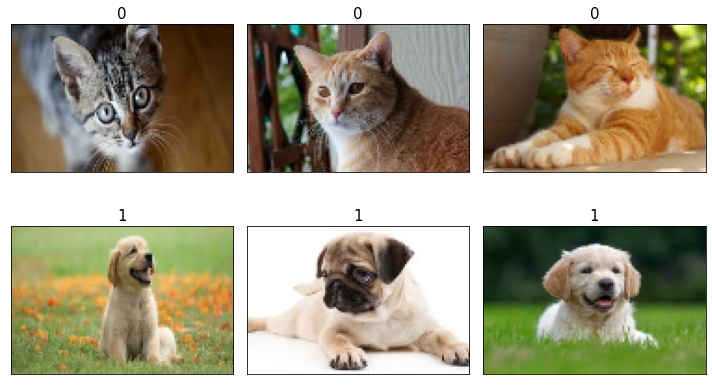

In [40]:
fig = plt.figure(figsize=(10, 6))
for i,example in enumerate(ds_images_labels):
 ax = fig.add_subplot(2, 3, i+1)
 ax.set_xticks([]); ax.set_yticks([])
 ax.imshow(example[0])
 ax.set_title('{}'.format(example[1].numpy()),
 size=15)
plt.tight_layout()
plt.show()

# **Fetching available datasets from the tensorflow_datasets library**

In [41]:
pip install tensorflow-datasets

let's import this module and take a look at the list of available datasets:

In [42]:
import tensorflow_datasets as tfds
print(len(tfds.list_builders()))

print(tfds.list_builders()[:5])

155
['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc']
